# Quantifying uncertainty: Confidence intervals

Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng(seed=123)

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Confidence intervals

Recall that if 

- $X_1, \ldots, X_n$ are a bunch of independent samples from some distribution with mean $\mu$,
- $\bar X$ is the sample mean, and
- $S$ is the sample standard deviation,

then the difference between the sample mean and $\mu$, in units of $S/\sqrt{n}$:
$$  T = \frac{\bar X - \mu}{S/\sqrt{n}}  $$
has, approximately$^*$, [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
with $n-1$ degrees of freedom.

$^*$ (the approximation is better the bigger $n$ is and the closer $X_i$ is to Normal)

Rearranging,
$$ \mu = \bar{X} + T \frac{S}{\sqrt{n}}  $$
... i.e., **the true mean is within a few$^*$ multiples of $S/\sqrt{n}$ of the sample mean**,
where "a few" has the $t(\text{df}=n-1)$ distribution.

Therefore, if we choose $t_*$ so that
$$ \P\{ - t_* \le T \le t* \} = 95\%, $$
then 
$$ \P\{ \bar X - t_* S / \sqrt{n} \le \mu \le \bar X + t_* S / \sqrt{n} \} = 95\% . $$

*Note:* the random quantities in that statement are $\bar X$ and $S$, not $\mu$!

## How to get a confidence interval

Suppose we have $n$ samples, with mean $\bar x$ and sample SD $s$, and that
$$ \P\{ - t_* \le T \le t_* \} = \alpha, $$
where $T$ has the Student's $t$ distribution with $\text{df}=n-1$.

Then a $\alpha$-confidence interval is
$$  \bar x - t_* s/\sqrt{n} \qquad \text{to} \qquad \bar x + t_* s/\sqrt{n} . $$

*What does it mean?*
If you do a great many experiments and in each construct a 95% confidence interval
for the mean,
then$^*$ the true mean should lie within 95% of those confidence intervals.

${}^*$ if the $t$-approximation is good.

**Question:** Why 95%?

**Question:** When can you say that "the probability that the true mean is in the confidence interval is 95%"?

**Question:** How far outside the confidence interval do you expect $\mu$ to be, in the other cases?

# Exercise: confidence intervals

I have surveyed 100 people with small puppies,
chosen randomly in Eugene,
and recorded how many puppy boops they had received in the last 24hrs.
Here are the data:

In [2]:
boops = np.array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  8,  8,
        8,  8,  8,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 13, 13, 14,
       15, 15, 15, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22,
       23, 23, 23, 25, 25, 26, 26, 27, 28, 28, 29, 30, 31, 31, 32, 33, 33,
       33, 37, 37, 38, 41, 42, 42, 43, 44, 46, 48, 53, 53, 68, 89])

**Important Question:** How many boops/day, on average, does a Eugene puppy owner get?
How sure are we, and how much variation between puppy owners is there?
We'd like to understand the accuracy for this important estimate as carefully as possible,
so be sure to validate the method you use with simulation.

**Plan:**

1. Look at the data.
2. Estimate the mean and provide a confidence interval.
3. Summarize between-owner variation.
4. Validate the *coverage* of our confidence-interval-producing procedure with simulation.

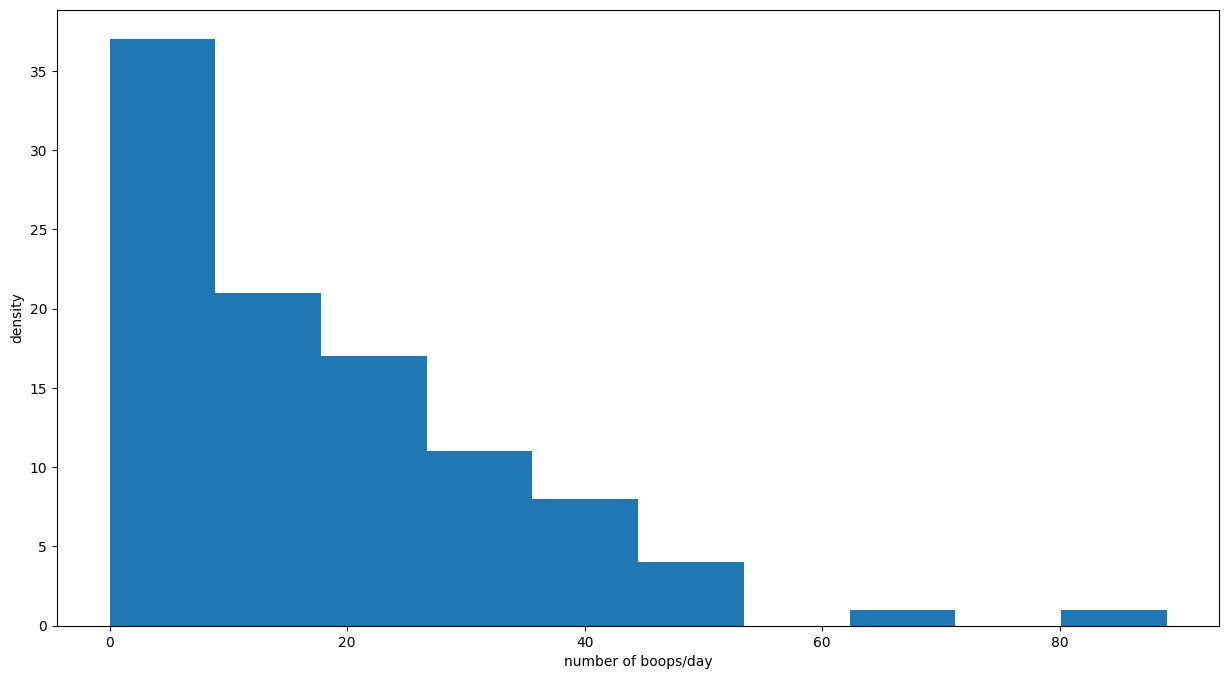

In [3]:
fig, ax = plt.subplots()
ax.hist(boops)
ax.set_ylabel("density")
ax.set_xlabel("number of boops/day");

In [8]:
mean_boops = np.mean(boops)
sd_boops = np.std(boops, ddof=1)
print(f"The mean number of boops/day is {mean_boops} boops and the SD is {sd_boops:.2f} boops.")

The mean number of boops/day is 17.79 boops and the SD is 16.42 boops.


In [18]:
from scipy.stats import t
n =  len(boops)
alpha = .95
# t_star = t.cdf(1 - (1 - alpha)/2, df=n-1) # no!
t_star = t.ppf(1 - (1 - alpha)/2, df=n-1)
mean_boops - t_star * sd_boops / np.sqrt(n), mean_boops + t_star * sd_boops / np.sqrt(n)

(14.532247400791988, 21.04775259920801)

Simulation study: is our procedure for getting CIs well-calibrated,
i.e., do they actually cover the true value 95% of the time?

What distribution shall we use?


In [ ]:
# code for plotting intervals

fig, ax = plt.subplots()
for k, (x0, x1) in enumerate(cis):
    ax.plot(np.repeat(k, 2), (x0, x1))
    
ax.axhline(sim_mean, c='red');